![](utils/eda.png)

this notebook for understanding and write ***EDA*** for `Car Price` Data set  
this Data set contain columns:    

`ID`,  
`Price`,  
`Levy`,  
`Manufacturer`,  
`Model`,  
`Prod. year`,  
`Category`,  
`Leather interior`,  
`Fuel type`,  
`Engine volume`,  
`Mileage`,  
`Cylinders`,  
`Gear box type`,  
`Drive wheels`,  
`Doors`,  
`Wheel`,  
`Color`,  
`Airbags`,  
`Random_notes`    


## Import Libraries  

first let's import the libraires we will use in this notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Understand the Dataset  

after we import useful libraries, we will try to understand our data set  

- first: Load the dataset into pandas.  

- secend:  
1- ***Missing values***  
2- ***Wrong data types***  
3- ***Duplicates***  
4- ***Outliers***  
5- ***Useless columns***  

In [3]:
car_sales = pd.read_csv('data/car_price_Dataset.csv')
car_sales.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Random_notes
0,45654403,$13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005KM,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,NaN
1,44731507,$16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000KM,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,NaN
2,45774419,$8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000KM,4.0,Variator,Front,04-May,Right-hand drive,Black,2,NaN
3,45769185,$3607,862,FORD,Escape,unknown,Jeep,Yes,Hybrid,2.5,168966KM,4.0,Automatic,4x4,04-May,Left wheel,White,0,NaN
4,45809263,$11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901KM,4.0,Automatic,Front,04-May,Left wheel,Silver,4,NaN
5,45802912,$39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931KM,4.0,Automatic,Front,04-May,Left wheel,White,4,NaN
6,45656768,$1803,NaN,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,NaN,4.0,Automatic,Front,04-May,Left wheel,NaN,12,NaN
7,45816158,$549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118KM,4.0,Automatic,Front,04-May,Left wheel,Grey,12,NaN
8,45641395,$1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069KM,4.0,Automatic,Front,04-May,Left wheel,Black,12,NaN
9,45756839,$26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500KM,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,NaN


In [4]:
car_sales.shape

(19737, 19)

In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19737 non-null  int64  
 1   Price             19737 non-null  object 
 2   Levy              17313 non-null  object 
 3   Manufacturer      19737 non-null  object 
 4   Model             19737 non-null  object 
 5   Prod. year        19737 non-null  object 
 6   Category          19737 non-null  object 
 7   Leather interior  19737 non-null  object 
 8   Fuel type         19737 non-null  object 
 9   Engine volume     19737 non-null  object 
 10  Mileage           17313 non-null  object 
 11  Cylinders         19737 non-null  float64
 12  Gear box type     19737 non-null  object 
 13  Drive wheels      19737 non-null  object 
 14  Doors             19737 non-null  object 
 15  Wheel             19737 non-null  object 
 16  Color             17313 non-null  object

From data we can see that   
`Price`, `Levy`, `Pred-year`, `Mileage`, `Cylinders` are integer data type   
but when print info thay are object or float,  
so we must solve this problem and change their data tyep   

also `Engine volume` column is float and show object in info, so also must change it 

In [6]:
car_sales['Price'] = car_sales['Price'].str.replace('$','',regex=False)
car_sales['Price'] = car_sales['Price'].astype(int)
print(car_sales['Price'].dtype)

int64


In [7]:
car_sales['Levy'] = car_sales['Levy'].str.replace('-','0',regex=False).astype(float).astype('Int64') 
print(car_sales['Levy'].dtype)

Int64


In [8]:
car_sales['Prod. year'] = car_sales['Prod. year'].str.replace('unknown','0',regex=False).astype('Int64')
print(car_sales['Prod. year'].dtype)

Int64


In [9]:
car_sales['Mileage'] = car_sales['Mileage'].str.replace('KM','',regex=False).astype(float).astype('Int64')
print(car_sales['Mileage'].dtype)

Int64


In [10]:
car_sales['Cylinders'] = car_sales['Cylinders'].astype('Int64')
print(car_sales['Cylinders'].dtype)

Int64


In [11]:
car_sales['Engine volume'] = car_sales['Engine volume'].str.replace(' Turbo','',regex=False).astype(float)
print(car_sales['Engine volume'].dtype)

float64


In [12]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19737 non-null  int64  
 1   Price             19737 non-null  int64  
 2   Levy              17313 non-null  Int64  
 3   Manufacturer      19737 non-null  object 
 4   Model             19737 non-null  object 
 5   Prod. year        19737 non-null  Int64  
 6   Category          19737 non-null  object 
 7   Leather interior  19737 non-null  object 
 8   Fuel type         19737 non-null  object 
 9   Engine volume     19737 non-null  float64
 10  Mileage           17313 non-null  Int64  
 11  Cylinders         19737 non-null  Int64  
 12  Gear box type     19737 non-null  object 
 13  Drive wheels      19737 non-null  object 
 14  Doors             19737 non-null  object 
 15  Wheel             19737 non-null  object 
 16  Color             17313 non-null  object

In [13]:
car_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19737.0,45578781.437655,928421.825928,20746880.0,45699907.0,45772362.0,45802049.0,45816654.0
Price,19737.0,19742.704514,191387.402866,-5000.0,5331.0,13172.0,22266.0,26307500.0
Levy,17313.0,631.477156,558.102768,0.0,0.0,642.0,915.0,11706.0
Prod. year,19737.0,1910.353397,438.346079,0.0,2008.0,2012.0,2014.0,2020.0
Engine volume,19737.0,2.307823,0.87726,0.0,1.8,2.0,2.5,20.0
Mileage,17313.0,1628425.765494,50453014.10164,0.0,70000.0,126021.0,189000.0,2147483647.0
Cylinders,19737.0,4.582865,1.199047,1.0,4.0,4.0,4.0,16.0
Airbags,19737.0,6.574454,4.318133,0.0,4.0,6.0,12.0,16.0
Random_notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
car_sales.describe(include=[object]).T

,count,unique,top,freq
Manufacturer,19737,65,HYUNDAI,3868
Model,19737,1590,Prius,1109
Category,19737,11,Sedan,8942
Leather interior,19737,2,Yes,14313
Fuel type,19737,7,Petrol,10415
Gear box type,19737,4,Automatic,13874
Drive wheels,19737,3,Front,13199
Doors,19737,3,04-May,18809
Wheel,19737,2,Left wheel,18216
Color,17313,16,Black,4501


In [15]:
car_sales.isna().sum()

ID                      0
Price                   0
Levy                 2424
Manufacturer            0
Model                   0
Prod. year              0
Category                0
Leather interior        0
Fuel type               0
Engine volume           0
Mileage              2424
Cylinders               0
Gear box type           0
Drive wheels            0
Doors                   0
Wheel                   0
Color                2424
Airbags                 0
Random_notes        19737
dtype: int64

all the data is clean ***except***  

Levy, Mileage, Color, Random_notes

In [16]:
car_sales.shape

(19737, 19)

In [17]:
100 - ((2424/car_sales.shape[0])*100)

87.71849825201399

in Levy & Mileage and Color we lose about 87 from the column and   
in Random Notes we loase all the date (might be unuseful feature), so we must drop it  

we can hanle the Levy, Mileage, Color features or drop them

In [18]:
missing_data = ['Random_notes']
car_sales.drop(columns=missing_data, inplace=True)
car_sales['Mileage'] = car_sales['Mileage'].fillna(int(car_sales['Mileage'].mean()))
car_sales['Levy'] = car_sales['Levy'].fillna(int(car_sales['Levy'].mean()))
car_sales['Color'] = car_sales['Color'].fillna(car_sales['Color'].mode()[0])
print(car_sales.shape)

(19737, 18)


the ID column is usless so we will drop it

In [19]:
car_sales.drop(columns=['ID'],axis=1, inplace=True)

In [20]:
car_sales[car_sales.duplicated()].shape

(3354, 17)

there are about 682 rows are dublicated

In [21]:
car_sales.drop_duplicates(keep='first', inplace=True)
car_sales.shape

(16383, 17)

Explore&Hanle outlier

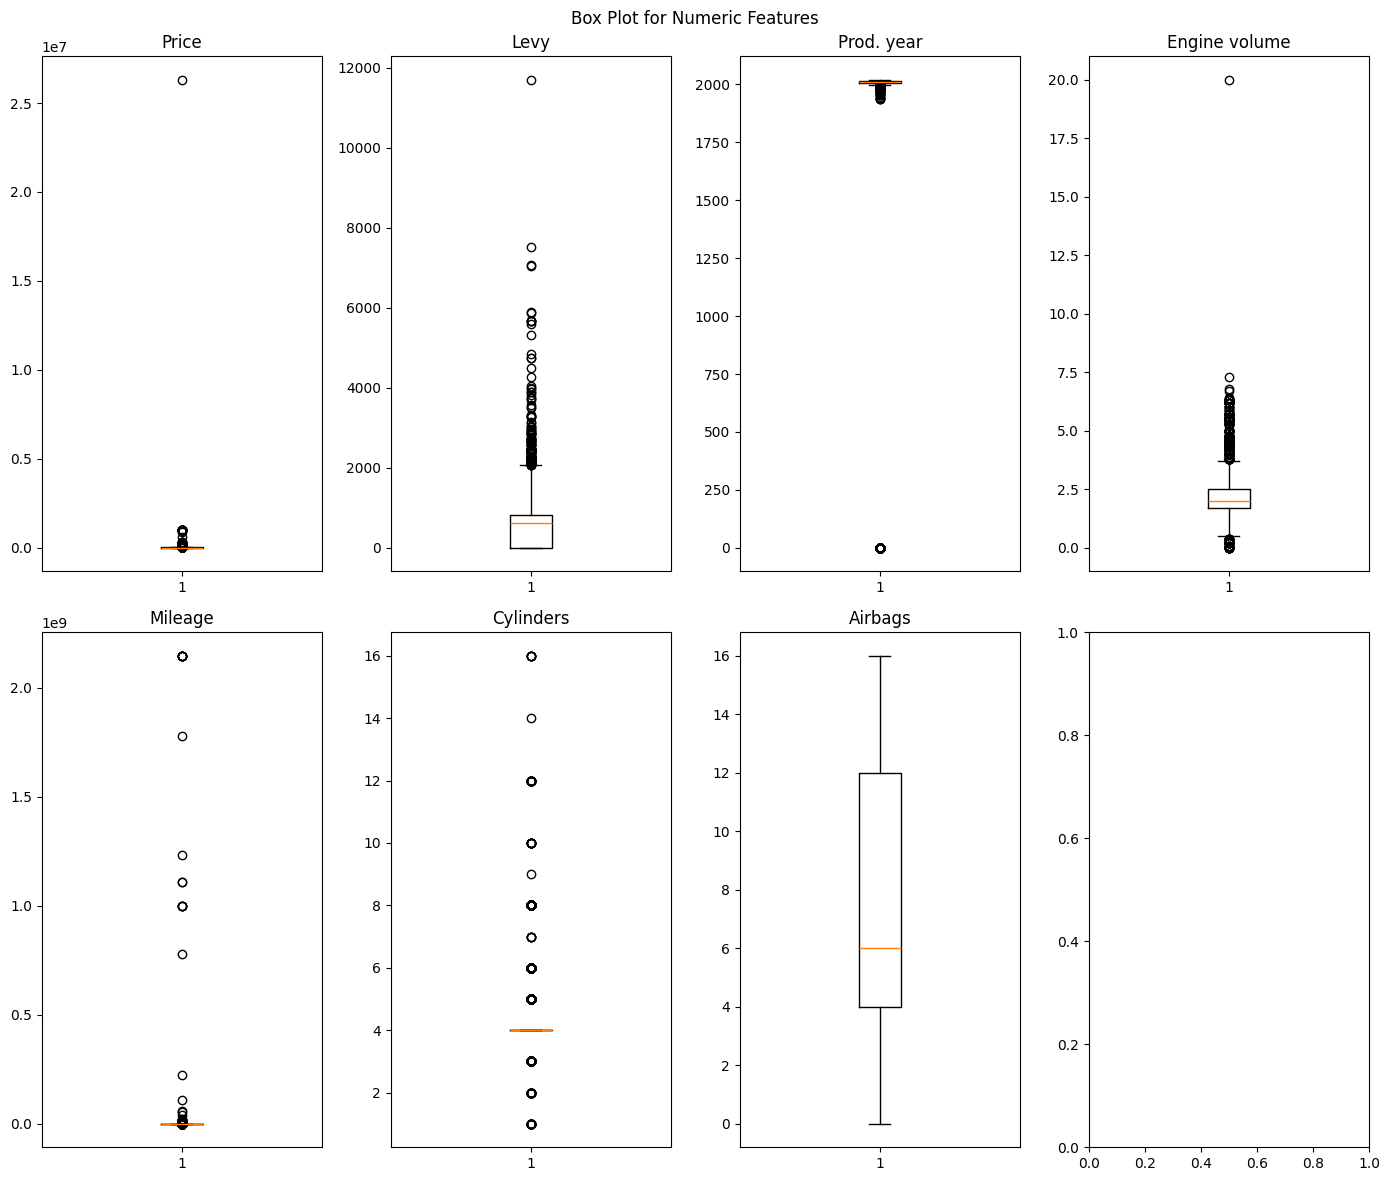

In [22]:
numeric_cols = car_sales.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(2,4, figsize=(14,12))

axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(car_sales[col])
    axes[i].set_title(col)


plt.suptitle("Box Plot for Numeric Features")
plt.tight_layout()
plt.show()


In [23]:
numeric_cols = car_sales.select_dtypes(include=['number']).columns

for col in numeric_cols:
    q1 = car_sales[col].quantile(0.25)
    q3 = car_sales[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    mask = (car_sales[col] < lower) | (car_sales[col] > upper)
    
    if mask.sum() > 0:
        print(f"Column {col} has {mask.sum()} outliers")

Column Price has 1008 outliers
Column Levy has 138 outliers
Column Prod. year has 1347 outliers
Column Engine volume has 777 outliers
Column Mileage has 2196 outliers
Column Cylinders has 3672 outliers


as shown the Price, Pred. year, Enfine Volume, Cylinders has outliers  
- `Price` is the target so we shouldn't remove his values so it maybe real values   
- `Pred. year` it maybe there are some cars produced in very oldest/newest years we can imuputate it or change with normal value  
- `Engine Volume` that's maybe because the Engine volume for some cars like Racing cars etc has very powerful engine volume (or another reason)  
- `Cylinders` the data show that there is no big change in values, but maybe as the distinct valure are few values so it show outlier  

## Data Cleaning  
* Handle Missing Values
* Remove Duplicates
* Fix Data Types
* Handle Outliers
* Drop Useless Columns

we already handled missing values  
           remove dublicates  
           fix data types
           drop useless columns
let's handle the outlier

- let's change the outlier values in engine volume to be in range lower&upper  
- remove 0 from year-prod

In [24]:
cols = ['Mileage','Engine volume']
for col in cols:
    q1 = car_sales[col].quantile(0.25)
    q3 = car_sales[col].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr

    car_sales[col] = np.where(car_sales[col] < lower, lower, 
                                    np.where(car_sales[col] > upper, upper, car_sales[col]))


In [25]:
zero_year_prod = car_sales[car_sales['Prod. year']==0].index
car_sales.drop(zero_year_prod, axis=0, inplace=True)
car_sales.shape

(15422, 17)

## Exploratory Data Analysis (EDA)  

- Distribution of prices
- Average price by manufacturer
- Year vs price (scatter plot)
- Mileage bins vs price (box plot).
- Countplot of car colors.

let's visualize our target feature `Price` and see his distribution

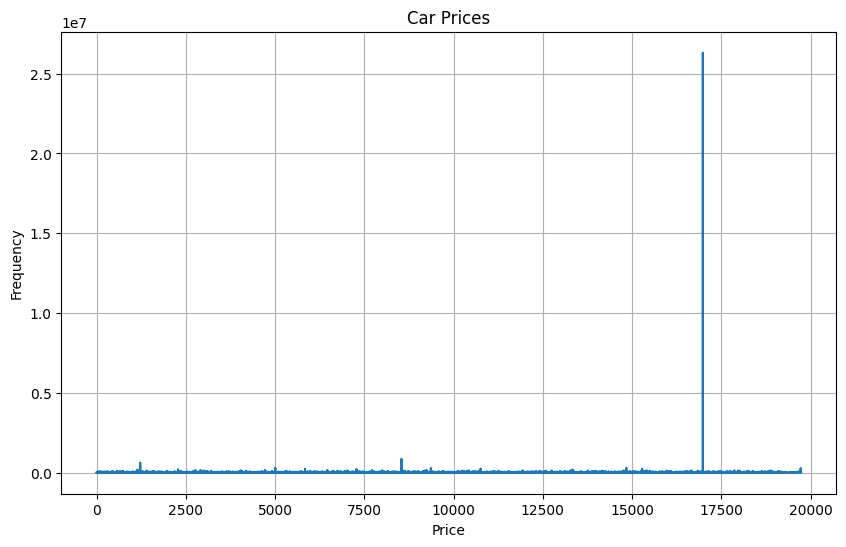

In [26]:
plt.figure(figsize=(10,6))

plt.plot(car_sales['Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Car Prices')

plt.grid()
plt.show()

we should log the price values to work with it

In [27]:
car_sales['log_price'] = np.log1p(car_sales['Price'])
car_sales['log_price']

0         9.497697
1         9.718482
2         9.044050
4         9.369649
5        10.583904
           ...    
19715     8.099858
19724    12.572527
19725     9.791270
19730     8.967122
19734    10.130225
Name: log_price, Length: 15422, dtype: float64

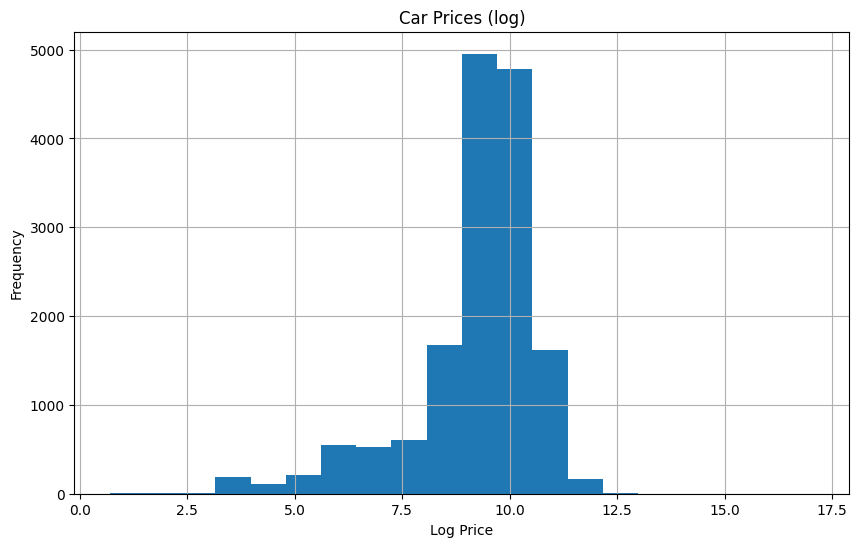

In [28]:
plt.figure(figsize=(10,6))

plt.hist(car_sales['log_price'], bins=20)
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Car Prices (log)')

plt.grid()
plt.show()

In [29]:
avg_price_by_manufacturer = car_sales.groupby(['Manufacturer'])['Price'].mean().reset_index()
avg_price_by_manufacturer=avg_price_by_manufacturer.sort_values(by='Price',ascending=False)
avg_price_by_manufacturer

,Manufacturer,Price
29,LAMBORGHINI,872946.000000
4,BENTLEY,197574.500000
42,OPEL,75561.736979
31,LAND ROVER,56789.558140
2,ASTON MARTIN,54000.000000
...,...,...
40,MOSKVICH,4609.000000
60,VAZ,4553.400000
63,ZAZ,3822.500000
48,ROVER,2433.333333


as we see the Manufacturer that has the heighest average price is `LAMBORGHINI`  
and we can see the gap between `LAMBORGHINI` and the secend `BENTLEY` it about 5 times

let's visualize the first and last 10 avg price 

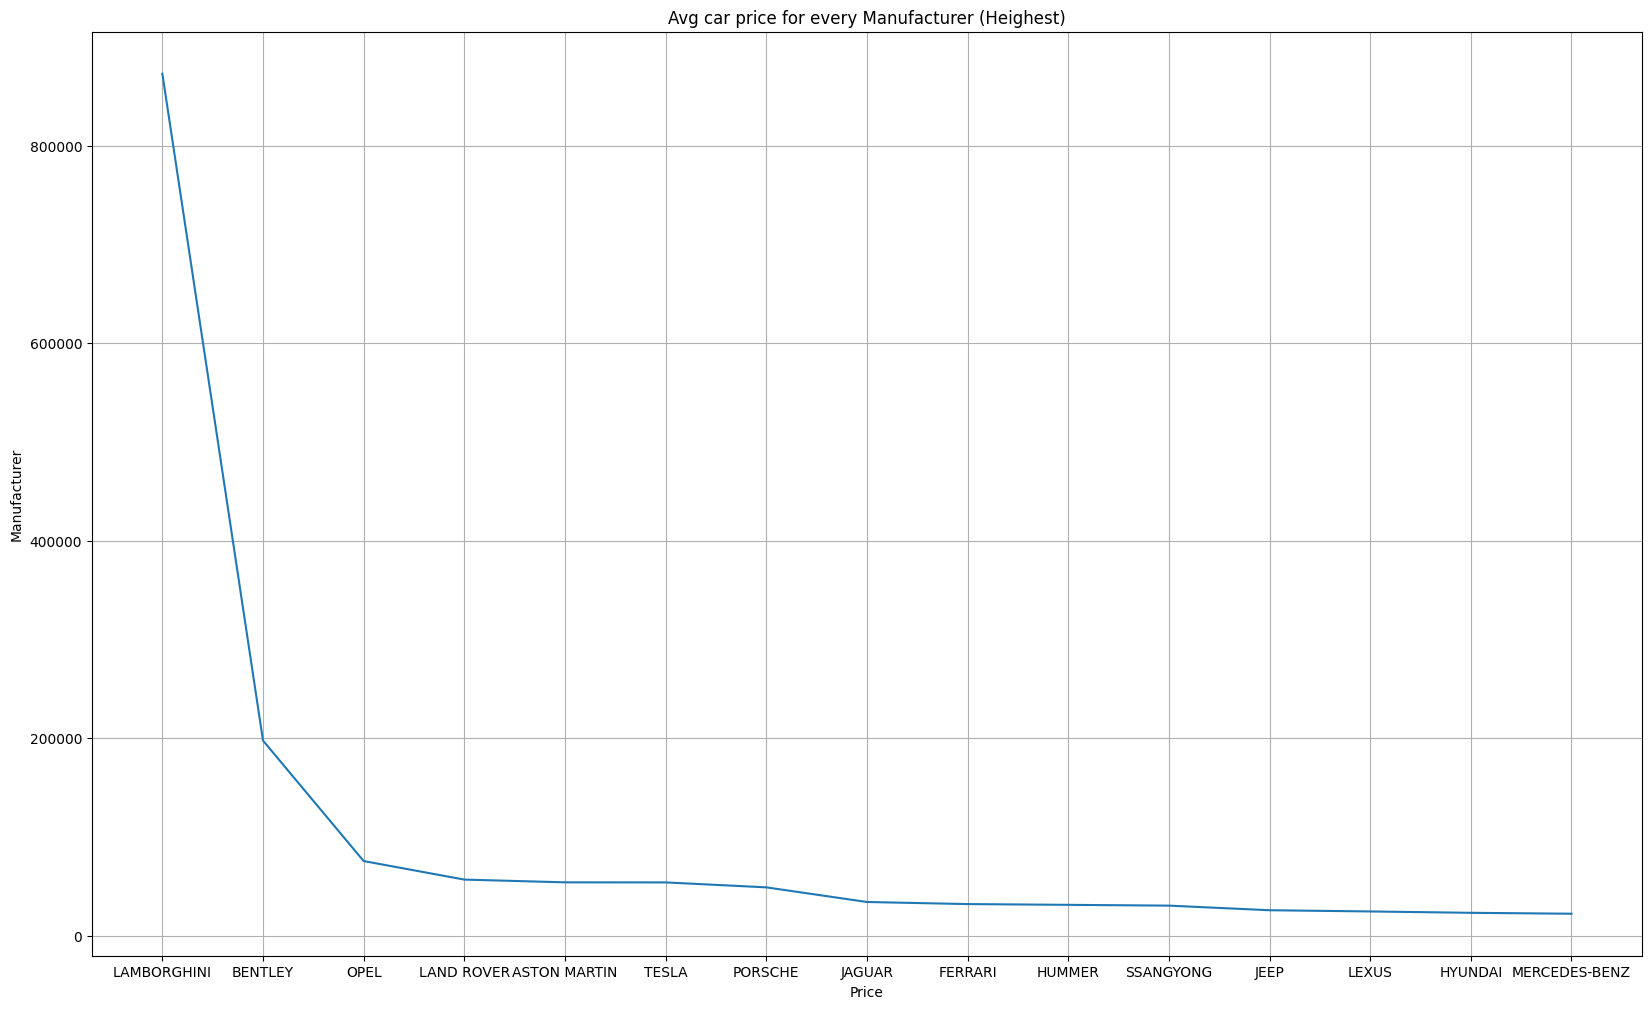

In [30]:
sample_avg_price = avg_price_by_manufacturer.head(15)
plt.figure(figsize=(20,12))

plt.plot(sample_avg_price['Manufacturer'], sample_avg_price['Price'])
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.title('Avg car price for every Manufacturer (Heighest)')

plt.grid()
plt.show()

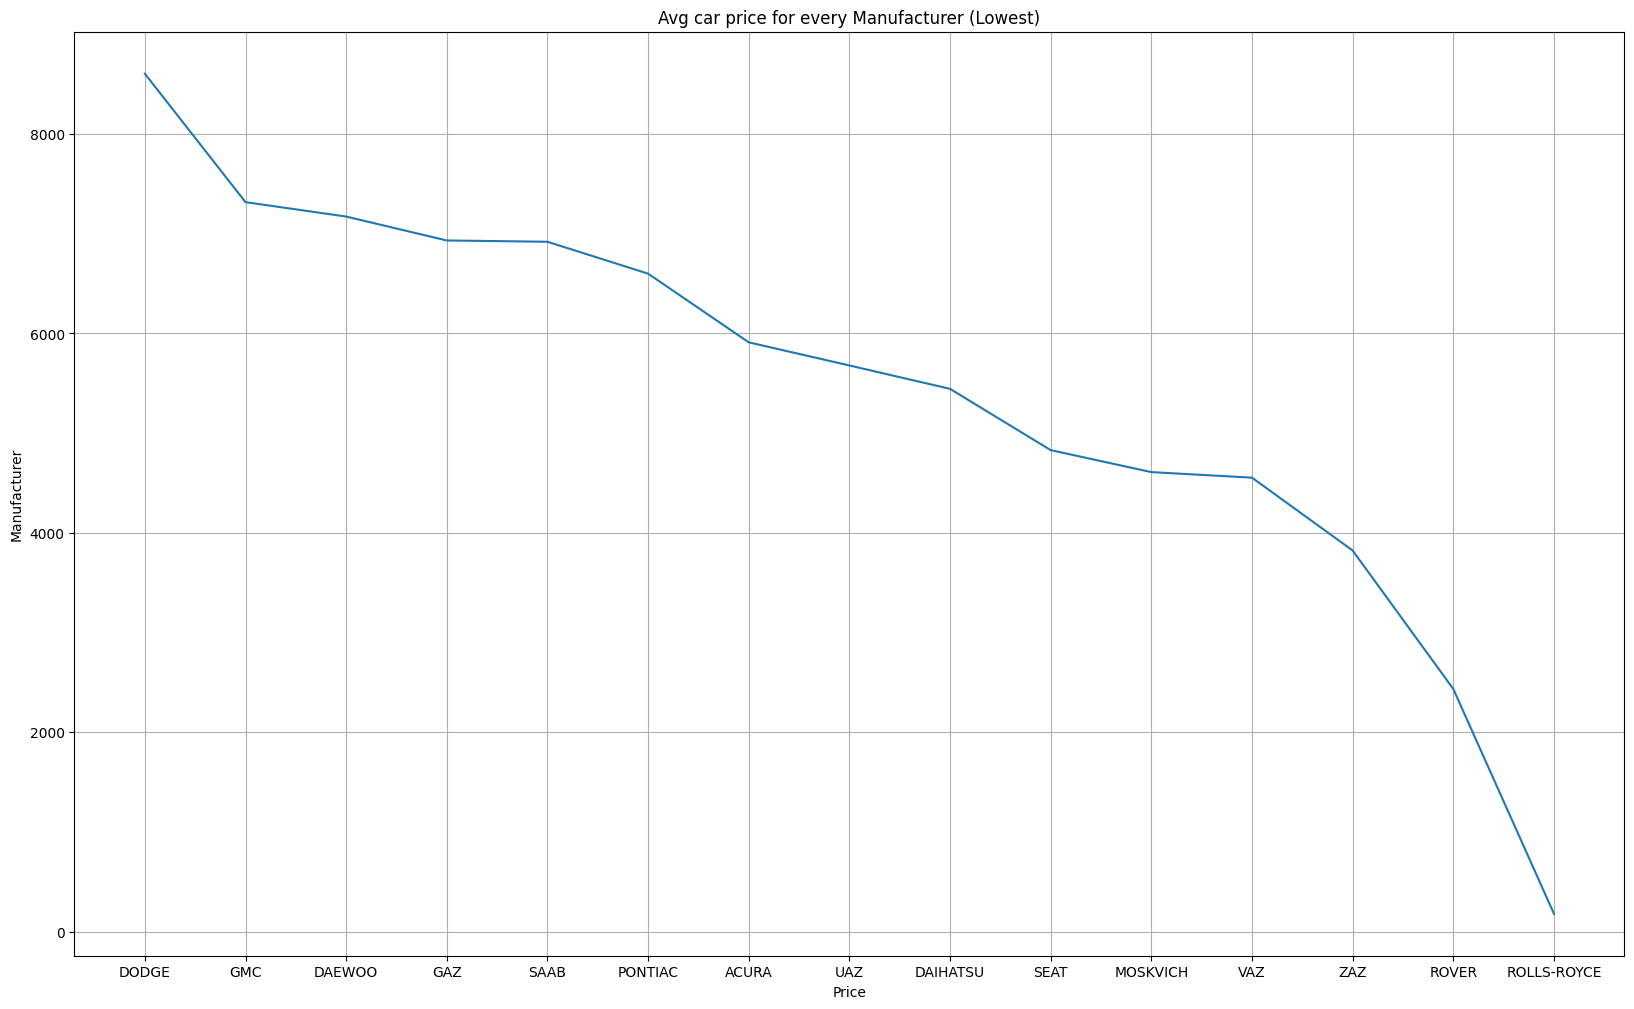

In [31]:
sample_avg_price = avg_price_by_manufacturer.tail(15)
plt.figure(figsize=(20,12))

plt.plot(sample_avg_price['Manufacturer'], sample_avg_price['Price'])
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.title('Avg car price for every Manufacturer (Lowest)')

plt.grid()
plt.show()

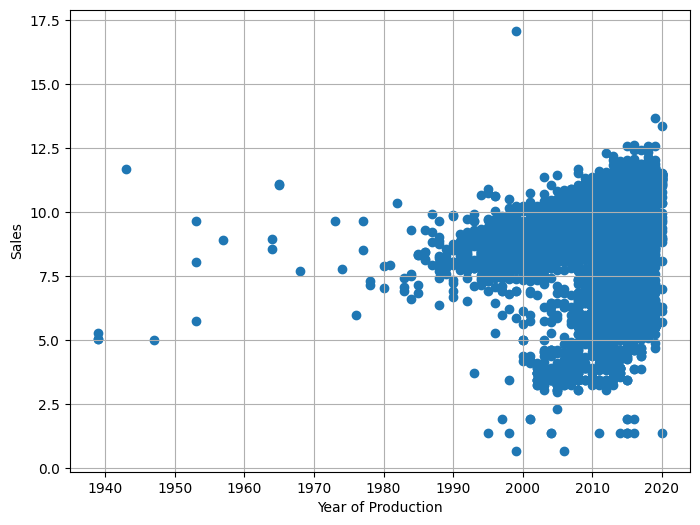

In [32]:
plt.figure(figsize=(8,6))

plt.scatter(car_sales['Prod. year'],car_sales['log_price'])
plt.xlabel('Year of Production')
plt.ylabel('Sales')

plt.grid()
plt.show()

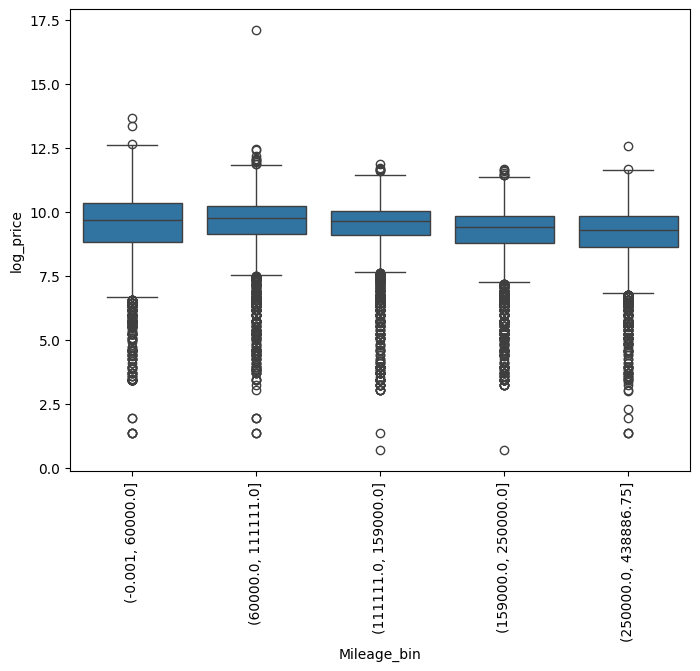

In [33]:
plt.figure(figsize=(8,6))

car_sales['Mileage_bin'] = pd.qcut(car_sales['Mileage'], q=5)
sns.boxplot(x='Mileage_bin', y='log_price', data=car_sales)
plt.xticks(rotation=90)
plt.show()

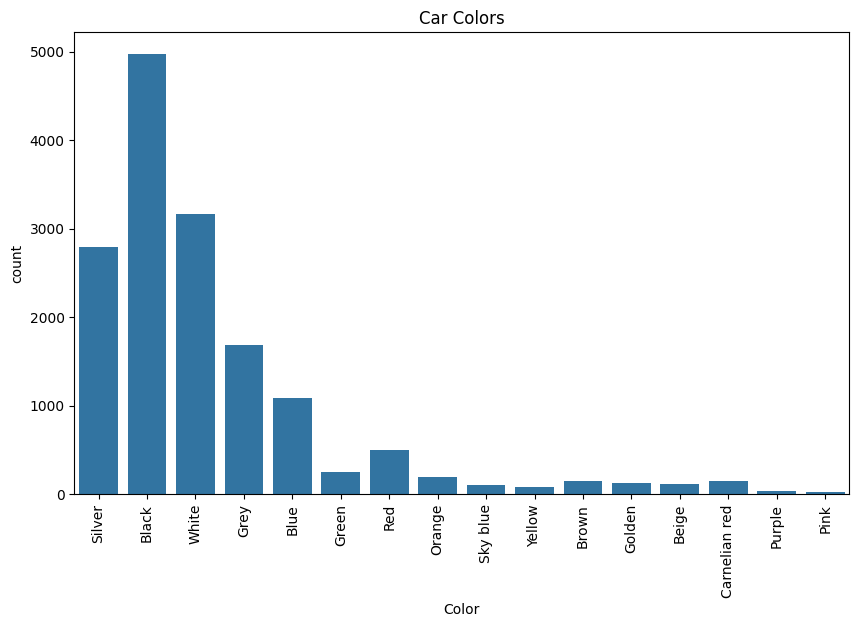

In [34]:
plt.figure(figsize=(10,6))

sns.countplot(x='Color',data=car_sales)
plt.title('Car Colors')
plt.xticks(rotation=90)
plt.show()